In [1]:
#problem statment
#The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.
#Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and
#find out the sales of each product at a particular store.


In [2]:
#hypothesis generation
#I came up with the following hypothesis while thinking about the problem. These are just my thoughts and you can 
#come-up with many more of these.
# store level hypotheses and product level hypothesis

In [3]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
train_data=pd.read_csv('Train.csv')
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test_data=pd.read_csv('Test.csv')
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
#EDA
train_data.shape

(8523, 12)

In [7]:
test_data.shape

(5681, 11)

In [8]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
train_data.columns.tolist()

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [11]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
train_data[train_data.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [14]:
train_data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [15]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [17]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

<AxesSubplot:>

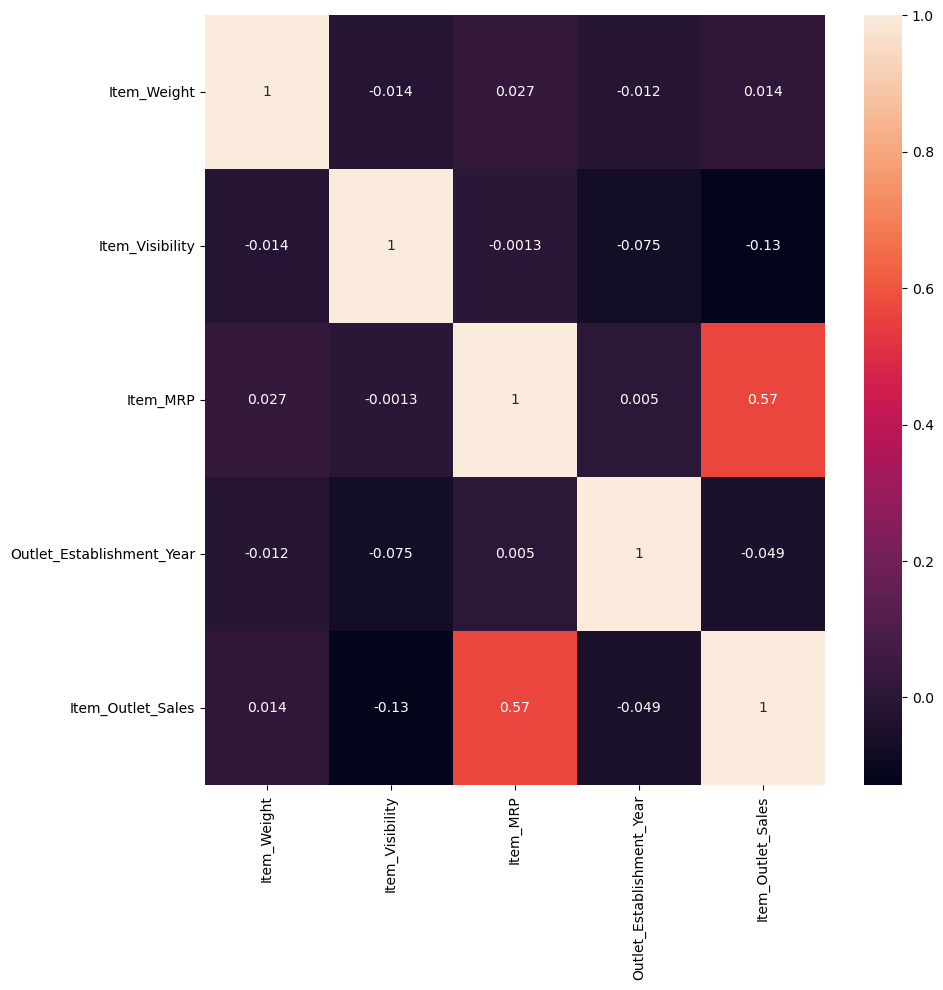

In [18]:
plt.subplots(figsize=(10,10))
sns.heatmap(train_data.corr(),annot=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

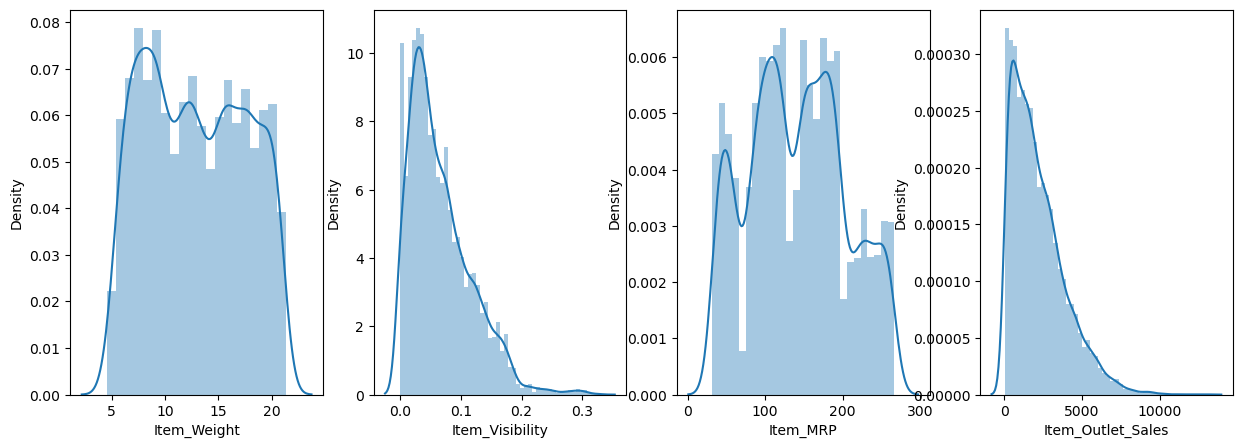

In [19]:
#univarient analysis
fig, axs = plt.subplots(ncols=4, figsize=(15, 5))
sns.distplot(train_data.Item_Weight, ax=axs[0])
sns.distplot(train_data.Item_Visibility,ax=axs[1])
sns.distplot(train_data.Item_MRP, ax=axs[2])
sns.distplot(train_data.Item_Outlet_Sales, ax=axs[3])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Item_Visibility')

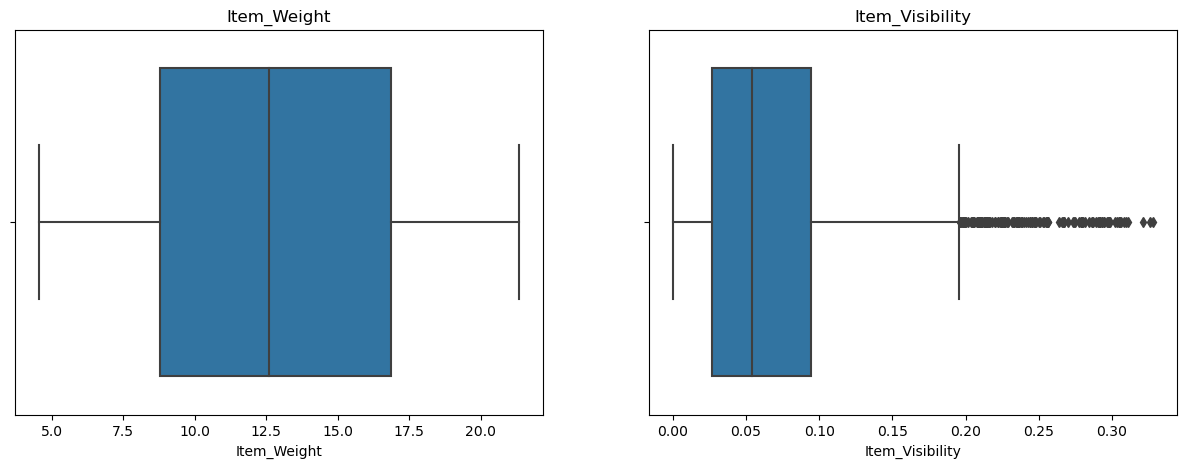

In [20]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.boxplot(train_data.Item_Weight,ax=axs[0]).set_title('Item_Weight')
sns.boxplot(train_data.Item_Visibility,ax=axs[1]).set_title('Item_Visibility')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Item_Outlet_Sales')

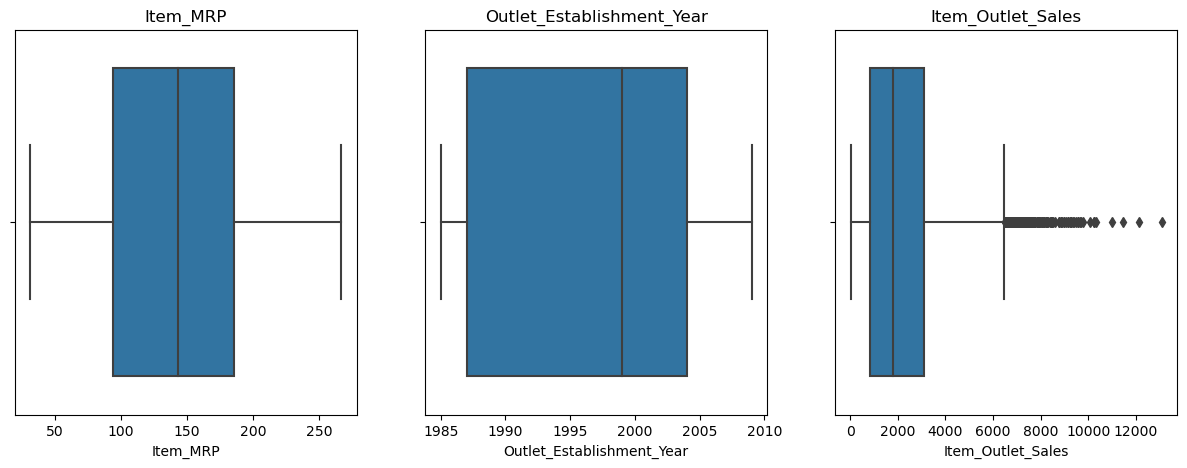

In [21]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.boxplot(train_data.Item_MRP,ax=axs[0]).set_title('Item_MRP')
sns.boxplot(train_data.Outlet_Establishment_Year,ax=axs[1]).set_title('Outlet_Establishment_Year')
sns.boxplot(train_data.Item_Outlet_Sales,ax=axs[2]).set_title('Item_Outlet_Sales')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Item_Visibility')

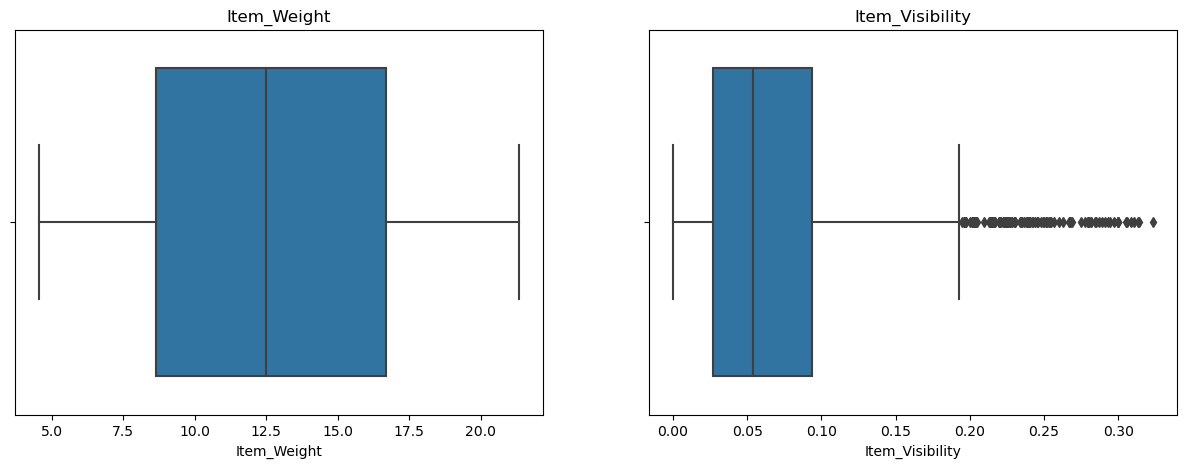

In [22]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.boxplot(test_data.Item_Weight,ax=axs[0]).set_title('Item_Weight')
sns.boxplot(test_data.Item_Visibility,ax=axs[1]).set_title('Item_Visibility')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Outlet_Establishment_Year')

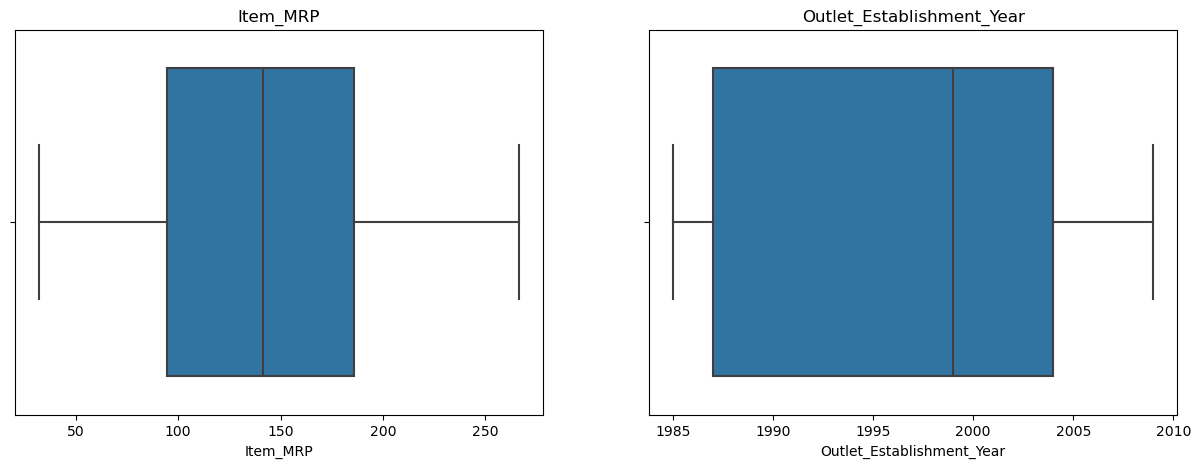

In [23]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.boxplot(test_data.Item_MRP,ax=axs[0]).set_title('Item_MRP')
sns.boxplot(test_data.Outlet_Establishment_Year,ax=axs[1]).set_title('Outlet_Establishment_Year')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

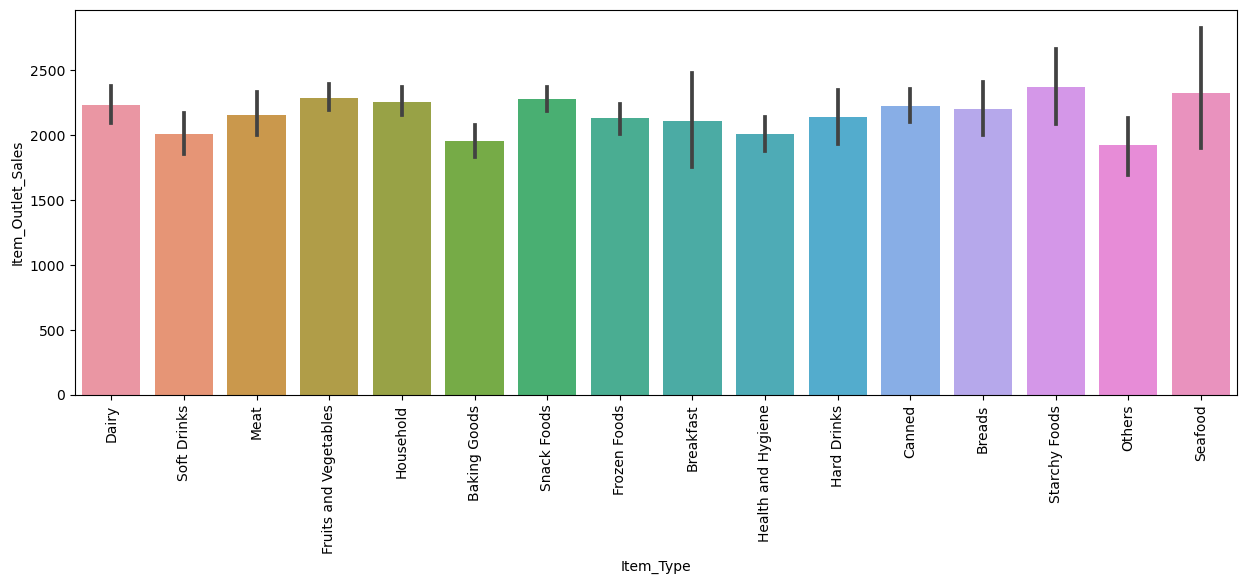

In [24]:
#bivarient analysis
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
sns.barplot(x=train_data['Item_Type'], y=train_data['Item_Outlet_Sales'])
plt.xticks(rotation='90')

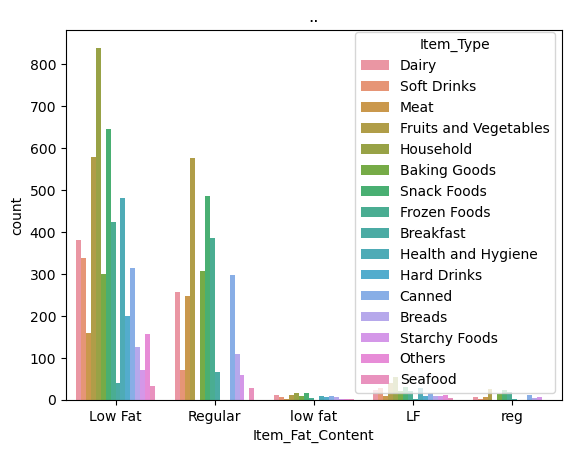

In [25]:
sns.countplot(x = 'Item_Fat_Content',  hue = 'Item_Type', data = train_data)
plt.title('..')
plt.show()

In [26]:
#missing value treatment
train_data['Item_Weight']=train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())

In [27]:
train_data['Outlet_Size']=train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])

In [28]:
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [29]:
test_data['Item_Weight']=test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean())
test_data['Outlet_Size']=test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0])
test_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

<AxesSubplot:>

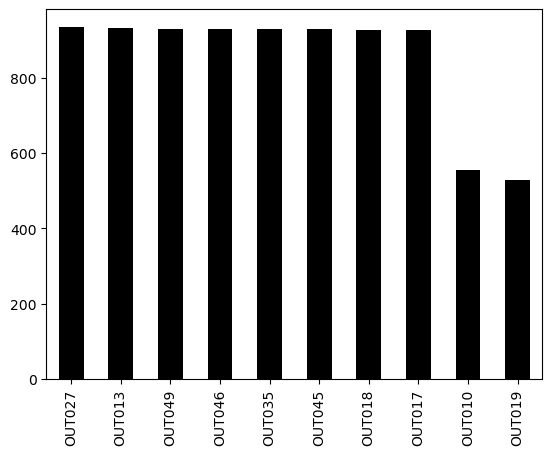

In [30]:
train_data['Outlet_Identifier'].value_counts().plot(kind='bar',color = 'Black')

In [31]:
train_data = train_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


<AxesSubplot:>

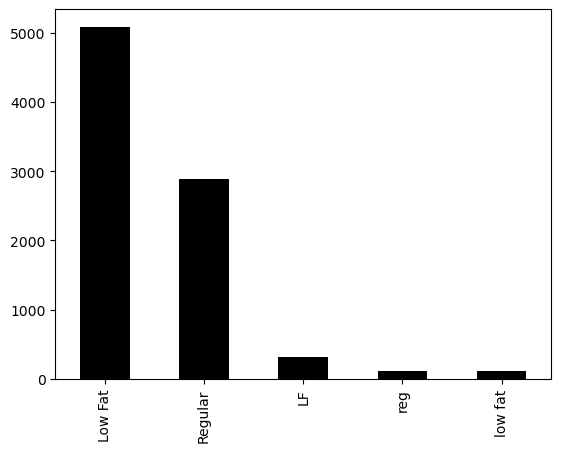

In [32]:
train_data['Item_Fat_Content'].value_counts().plot(kind='bar',color = 'black')

In [33]:
train_data = train_data.replace(to_replace ="low fat", value ="Low Fat")
train_data = train_data.replace(to_replace ="LF",value ="Low Fat")
train_data = train_data.replace(to_replace ="reg",value="Regular")

<AxesSubplot:>

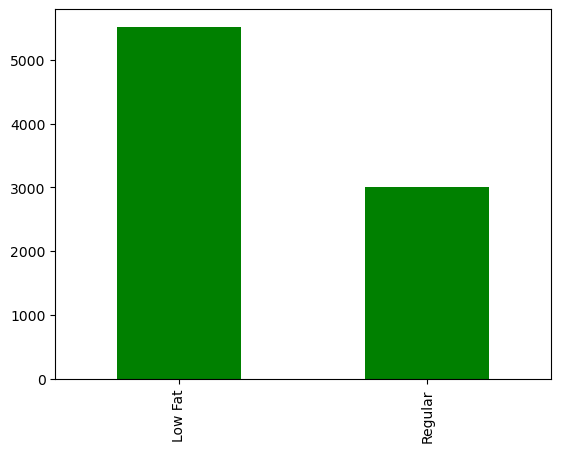

In [34]:
train_data['Item_Fat_Content'].value_counts().plot(kind='bar',color = 'Green')

<AxesSubplot:>

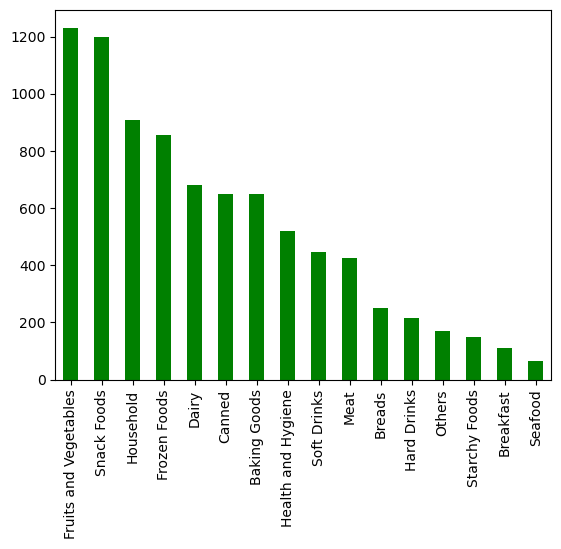

In [35]:
train_data['Item_Type'].value_counts().plot(kind='bar',color = 'Green')

<AxesSubplot:>

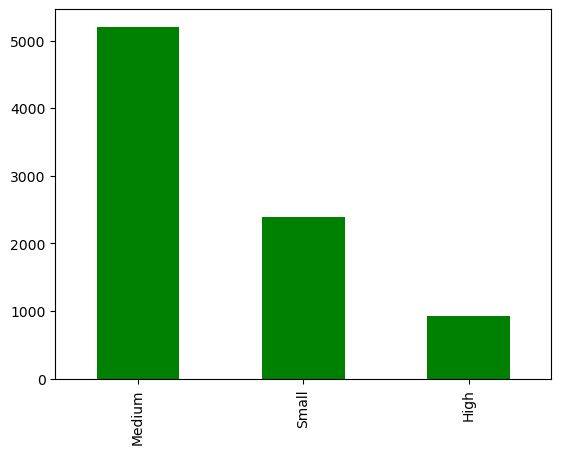

In [36]:
train_data['Outlet_Size'].value_counts().plot(kind='bar',color = 'Green')

<AxesSubplot:>

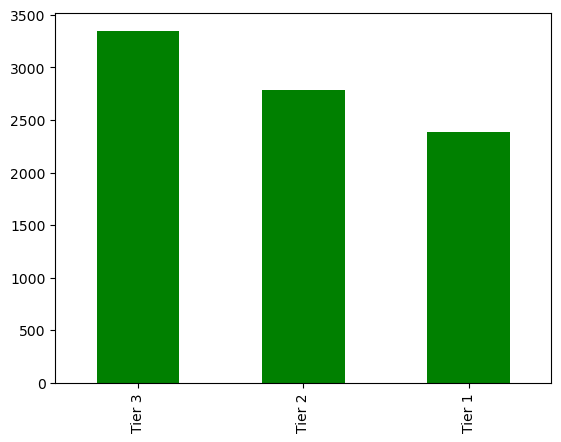

In [37]:
train_data['Outlet_Location_Type'].value_counts().plot(kind='bar',color='Green')

<AxesSubplot:>

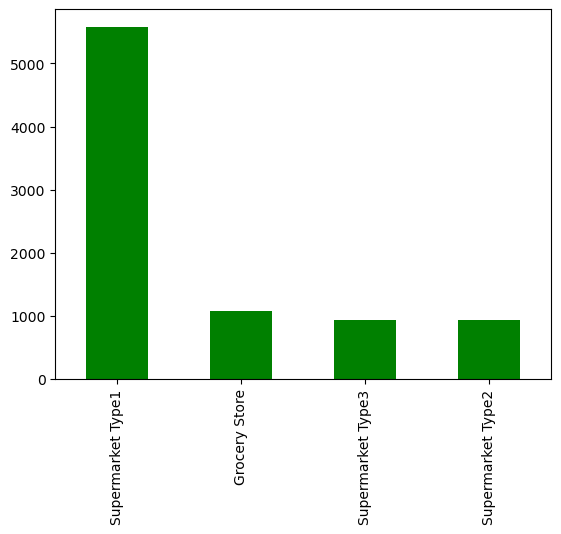

In [38]:
train_data['Outlet_Type'].value_counts().plot(kind ='bar',color='Green')

In [39]:
categorical_columns=[x for x in train_data.dtypes.index if train_data.dtypes[x]=='object']
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [40]:
for col in categorical_columns:
    print('Frequency of categories for variable')
    print(train_data[col].value_counts())
    print("\n")

Frequency of categories for variable
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Frequency of categories for variable
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Frequency of categories for variable
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Frequency of categories for variable
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


Frequency of categories for variable
Supermarket Type1    5577
Grocery Store        1083
Supermarket T

In [41]:
#encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in train_data.columns:
    train_data[col] = labelencoder.fit_transform(train_data[col])

In [43]:
train_data=pd.get_dummies(train_data,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'], drop_first=False)

train_data.shape

(8523, 33)

In [44]:
train_data.columns.tolist()

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales',
 'Item_Fat_Content_0',
 'Item_Fat_Content_1',
 'Item_Type_0',
 'Item_Type_1',
 'Item_Type_2',
 'Item_Type_3',
 'Item_Type_4',
 'Item_Type_5',
 'Item_Type_6',
 'Item_Type_7',
 'Item_Type_8',
 'Item_Type_9',
 'Item_Type_10',
 'Item_Type_11',
 'Item_Type_12',
 'Item_Type_13',
 'Item_Type_14',
 'Item_Type_15',
 'Outlet_Size_0',
 'Outlet_Size_1',
 'Outlet_Size_2',
 'Outlet_Location_Type_0',
 'Outlet_Location_Type_1',
 'Outlet_Location_Type_2',
 'Outlet_Type_0',
 'Outlet_Type_1',
 'Outlet_Type_2',
 'Outlet_Type_3']

In [45]:
train_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,284,664,5592,4,2540,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,57,880,473,8,422,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,376,715,2901,4,1639,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,393,0,4227,3,670,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,265,0,627,1,865,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [46]:
train_data.shape

(8523, 33)

In [47]:
for col in train_data.columns:
    print(col)

Item_Weight
Item_Visibility
Item_MRP
Outlet_Establishment_Year
Item_Outlet_Sales
Item_Fat_Content_0
Item_Fat_Content_1
Item_Type_0
Item_Type_1
Item_Type_2
Item_Type_3
Item_Type_4
Item_Type_5
Item_Type_6
Item_Type_7
Item_Type_8
Item_Type_9
Item_Type_10
Item_Type_11
Item_Type_12
Item_Type_13
Item_Type_14
Item_Type_15
Outlet_Size_0
Outlet_Size_1
Outlet_Size_2
Outlet_Location_Type_0
Outlet_Location_Type_1
Outlet_Location_Type_2
Outlet_Type_0
Outlet_Type_1
Outlet_Type_2
Outlet_Type_3


In [48]:
#modelling

In [49]:

from sklearn.model_selection import train_test_split
x=train_data.drop(columns=['Item_Outlet_Sales'])
y=train_data['Item_Outlet_Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [50]:
train_data.info()
  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Item_Weight                8523 non-null   int64
 1   Item_Visibility            8523 non-null   int64
 2   Item_MRP                   8523 non-null   int64
 3   Outlet_Establishment_Year  8523 non-null   int64
 4   Item_Outlet_Sales          8523 non-null   int64
 5   Item_Fat_Content_0         8523 non-null   uint8
 6   Item_Fat_Content_1         8523 non-null   uint8
 7   Item_Type_0                8523 non-null   uint8
 8   Item_Type_1                8523 non-null   uint8
 9   Item_Type_2                8523 non-null   uint8
 10  Item_Type_3                8523 non-null   uint8
 11  Item_Type_4                8523 non-null   uint8
 12  Item_Type_5                8523 non-null   uint8
 13  Item_Type_6                8523 non-null   uint8
 14  Item_Type_7             

In [51]:
from sklearn.linear_model import LinearRegression as LR
lr = LR()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.647432950489345

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [53]:
y_pred = rf_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
# Evaluate the model's performance using R-squared score
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R-squared Score: ", r2)

Mean Squared Error:  302334.0339642229
R-squared Score:  0.6326061215329382


In [54]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(x_train, y_train)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(x_test, y_test))

0.6473317472519642


In [55]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925)
lassoModelChosen.fit(x_train, y_train)
 
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(x_test, y_test))

0.6456525561477529


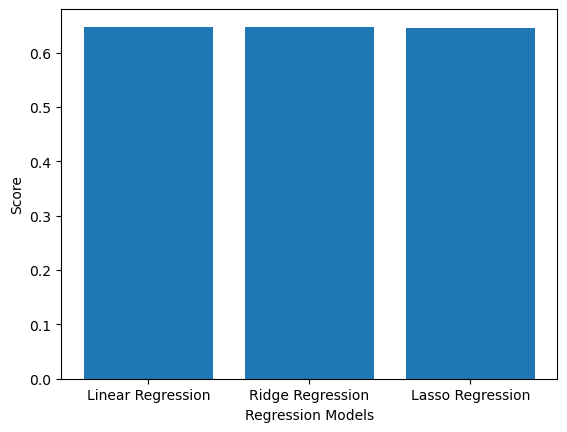

In [56]:
# Plotting the scores
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
scores = [lr.score(x_test, y_test),
         ridgeModelChosen.score(x_test, y_test),
         lassoModelChosen.score(x_test, y_test)]
plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.show()

In [57]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [58]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


# Create the XGBoost model and fit on the training data
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(x_test)

# Calculate mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Evaluate the model using R-squared score
r2_score = r2_score(y_test, y_pred)
print("R-squared score:", r2_score)

Mean squared error: 321439.2308054815
R-squared score: 0.6093896404958834


In [ ]:
Linear Regression and Lasso Regressor have the better accuracy.